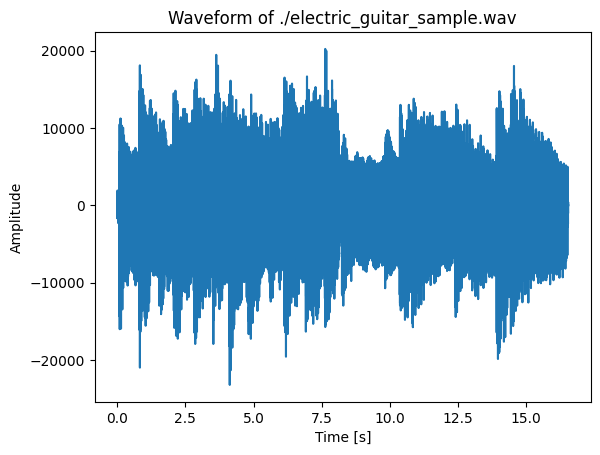

In [1]:
# open wave file and plot as input waveform

import wave
import numpy as np
import matplotlib.pyplot as plt

file_path = "./electric_guitar_sample.wav"

with wave.open(file_path, 'r') as wave_file:
    # get the number of frames
    n_frames = wave_file.getnframes()
    # read the frames
    frames = wave_file.readframes(n_frames)
    # convert frames to integers
    frames = np.frombuffer(frames, dtype=np.int16)

    # get the frame rate
    frame_rate = wave_file.getframerate()
    # get the time values for the x axis
    time = np.linspace(0, len(frames) / frame_rate, num=len(frames))

    # plot the waveform
    plt.figure()
    plt.plot(time, frames, label='Waveform')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform of ' + file_path)
    plt.show()


In [2]:
#playback origianl waveform using pyaudio
import pyaudio

# set up the audio stream
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=frame_rate, output=True)

# play the audio
stream.write(frames.tobytes())


# Distortion Algorithm

In [24]:
def distort(waveform: np.array, threshold: int, clip_factor: float) -> list:
    """Distort the waveform by clipping the values above the threshold and below the negative threshold and softening the clipped values."""
    # This function will be replaced by HLS code
    distorted_waveform = waveform

    # apply clipping
    distorted_waveform = np.where(distorted_waveform > threshold, (distorted_waveform - threshold) * clip_factor + threshold, distorted_waveform)
    distorted_waveform = np.where(distorted_waveform <  -threshold, (distorted_waveform - threshold) * clip_factor - threshold, distorted_waveform)
    return distorted_waveform
    
    
    

<class 'numpy.ndarray'>
Distored [  0.   0.  42.  38.  86.  77. 130. 116. 173. 155.]


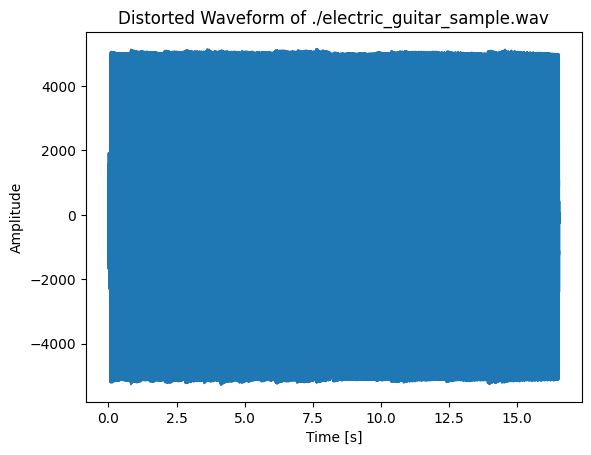

In [33]:
distored_frames = frames # make a copy of the original waveform

threshold = 5000 # this is the amplitude that will start the audio clipping
clip_factor = 0 # this is the factor that will soften the clipped audio

distored_frames = distort(distored_frames, threshold, clip_factor)
print(type(distored_frames))
print(f"Distored {distored_frames[:10]}")

# plot the waveform
plt.figure()
plt.plot(time, distored_frames, label='Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Distorted Waveform of ' + file_path)
plt.show()


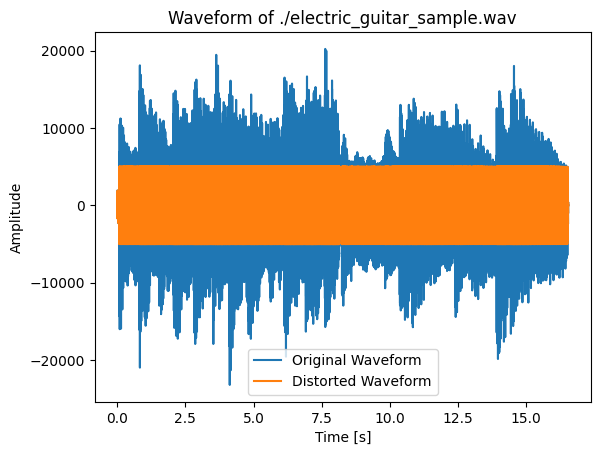

In [31]:
#plot frames and distored frames together to show the difference
plt.figure()
plt.plot(time, frames, label='Original Waveform')
plt.plot(time, distored_frames, label='Distorted Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Waveform of ' + file_path)
plt.legend()
plt.show()


In [34]:
#playback origianl waveform using pyaudio
import pyaudio

# set up the audio stream
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=frame_rate, output=True)

# convert python array to numpy ndarray
# distored_frames = np.array(distored_frames, dtype=np.int16)
# play the audio
stream.write(distored_frames.tobytes())



In [7]:
print(type(frames))

<class 'numpy.ndarray'>
